In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [11]:
np.random.seed(42)
n = 30

age = np.random.randint(20,60,n).astype(float)
salary = np.random.randint(20000, 200000, n).astype(float)
experience = np.random.randint(0, 35, n).astype(float)

salary

array([ 85725., 149981., 104654., 186845., 139346.,  87435.,  76886.,
        86803.,  51551., 136216.,  31394.,  89092.,  23890.,  61606.,
       107313., 161699.,  28792., 194073., 174969.,  88148., 144243.,
       140174., 174555., 144358.,  68555.,  37159., 130510., 126530.,
       100077.,  55920.])

In [8]:
education = np.random.choice(["highschool", "bachelor", "master", "phd"], size=n)
city = np.random.choice(["Mumbai", "Bangalore", "Kolkata", "Delhi"], size=n)
owns_car = np.random.choice(["yes", "no"], size=n)

In [9]:
prob = (
    (salary / salary.max()) * 0.6
    + (experience / experience.max()) * 0.3
    + np.random.rand(n) * 0.1
)
prob

array([0.38234367, 0.53608534, 0.40290794, 0.63984745, 0.75794593,
       0.51457229, 0.55368368, 0.64634946, 0.30539746, 0.54772395,
       0.38594847, 0.49256677, 0.19813808, 0.30956388, 0.54191819,
       0.74808025, 0.22588372, 0.77062626, 0.80490198, 0.56898238,
       0.72932251, 0.71033715, 0.73814841, 0.47002501, 0.46266781,
       0.24407611, 0.54117791, 0.68519595, 0.37516136, 0.29335062])

In [17]:
target = (prob > 0.5).astype(int)

In [18]:
df = pd.DataFrame(
    {
        "age": age,
        "salary": salary,
        "experience_years": experience,
        "education_level": education,
        "city": city,
        "owns_car": owns_car,
        "target": target,
    }
)

In [19]:
df.head(5)

,age,salary,experience_years,education_level,city,owns_car,target
0,58.0,85725.0,3.0,bachelor,Bangalore,no,0
1,48.0,149981.0,1.0,phd,Bangalore,yes,1
2,34.0,104654.0,5.0,bachelor,Kolkata,no,0
3,27.0,186845.0,3.0,master,Kolkata,no,1
4,40.0,139346.0,28.0,highschool,Delhi,yes,1


In [20]:
df.index

RangeIndex(start=0, stop=30, step=1)

In [31]:
idx = np.random.choice(df.index, size=6, replace=False)


In [33]:
df.loc[idx[:2],'salary']
idx = np.random.choice(df.index, size=6, replace=False)
df.loc[idx[:2], "salary"] = np.nan
df.loc[idx[2:4], "experience_years"] = np.nan
df.loc[idx[4:], "owns_car"] = np.nan

In [36]:
df.isnull().sum()

age                 0
salary              2
experience_years    2
education_level     0
city                0
owns_car            2
target              0
dtype: int64

In [80]:
df['city'].value_counts()

city
Delhi        11
Kolkata      10
Mumbai        5
Bangalore     4
Name: count, dtype: int64

In [38]:
numeric_cols = ["age", "salary", "experience_years"]

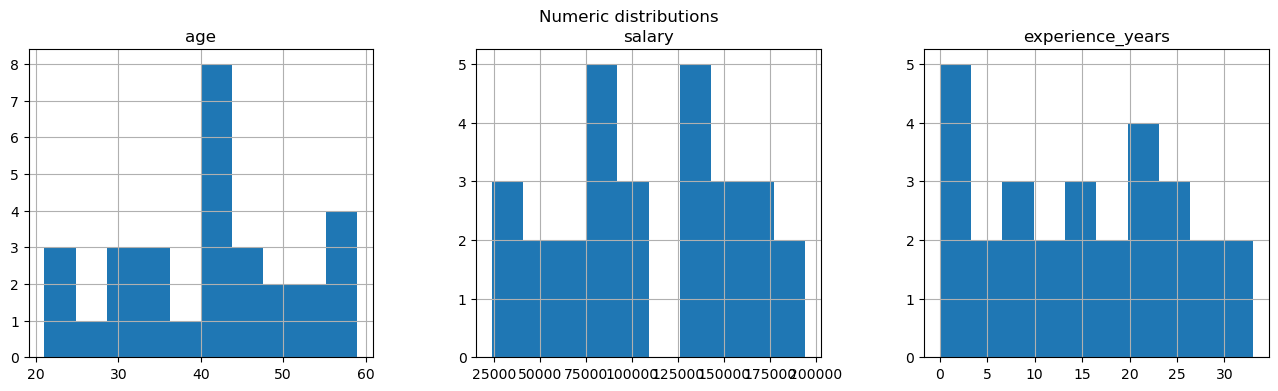

In [42]:
df[numeric_cols].hist(bins=10, layout=(1, 3), figsize=(16, 4))
plt.suptitle("Numeric distributions")
plt.show()

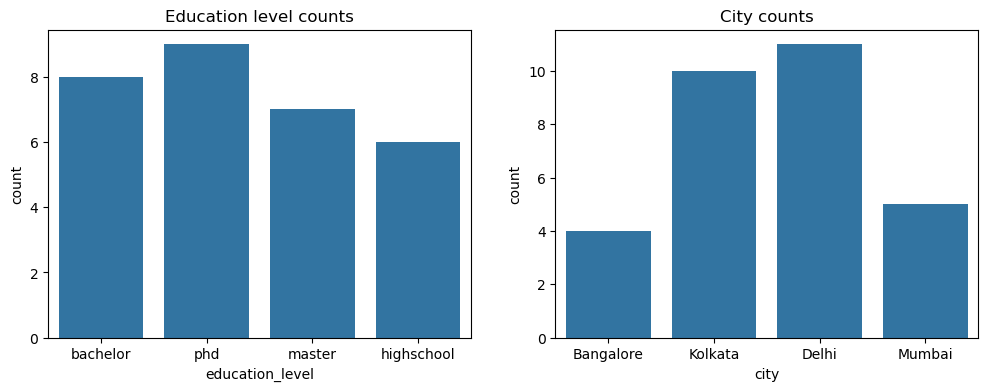

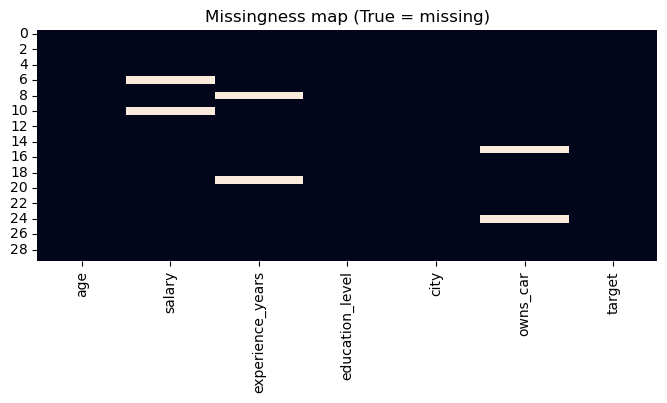

In [43]:
# bar plots for categorical columns
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.countplot(x="education_level", data=df, ax=axes[0])
axes[0].set_title("Education level counts")
sns.countplot(x="city", data=df, ax=axes[1])
axes[1].set_title("City counts")
plt.show()

# missingness heatmap
plt.figure(figsize=(8, 3))
sns.heatmap(df.isnull(), cbar=False)
plt.title("Missingness map (True = missing)")
plt.show()

In [44]:
X = df.drop(columns=['target'])
y = df['target']

In [46]:
X.head()

,age,salary,experience_years,education_level,city,owns_car
0,58.0,85725.0,3.0,bachelor,Bangalore,no
1,48.0,149981.0,1.0,phd,Bangalore,yes
2,34.0,104654.0,5.0,bachelor,Kolkata,no
3,27.0,186845.0,3.0,master,Kolkata,no
4,40.0,139346.0,28.0,highschool,Delhi,yes


In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

In [49]:
print("X_train:", X_train.shape, "X_test:", X_test.shape)

X_train: (22, 6) X_test: (8, 6)


In [69]:
numeric_cols = ['age','salary','experience_years']
ordinal_col = ['education_level']
nominal_cols = ['city','owns_car']

In [53]:
from sklearn.impute import SimpleImputer

num_imputer = SimpleImputer(strategy='median')
X_train_num = num_imputer.fit_transform(X_train[numeric_cols])
X_train_num 

array([[3.00000e+01, 5.15510e+04, 1.35000e+01],
       [5.70000e+01, 8.81480e+04, 1.35000e+01],
       [4.10000e+01, 6.85550e+04, 2.40000e+01],
       [3.40000e+01, 5.59200e+04, 7.00000e+00],
       [3.50000e+01, 1.00077e+05, 0.00000e+00],
       [4.30000e+01, 1.94073e+05, 1.70000e+01],
       [4.10000e+01, 1.61699e+05, 2.00000e+01],
       [4.00000e+01, 1.40174e+05, 2.80000e+01],
       [5.90000e+01, 2.38900e+04, 7.00000e+00],
       [4.60000e+01, 1.30510e+05, 8.00000e+00],
       [5.50000e+01, 8.90920e+04, 1.40000e+01],
       [3.10000e+01, 1.44358e+05, 0.00000e+00],
       [3.40000e+01, 1.04654e+05, 5.00000e+00],
       [2.70000e+01, 1.86845e+05, 3.00000e+00],
       [5.80000e+01, 8.57250e+04, 3.00000e+00],
       [3.00000e+01, 1.36216e+05, 1.30000e+01],
       [4.90000e+01, 1.74969e+05, 2.30000e+01],
       [4.80000e+01, 1.49981e+05, 1.00000e+00],
       [2.10000e+01, 1.44243e+05, 2.40000e+01],
       [2.10000e+01, 2.87920e+04, 1.50000e+01],
       [5.80000e+01, 8.74350e+04, 1.7000

In [54]:
X_train_num = pd.DataFrame(X_train_num, columns=numeric_cols,index=X_train.index)

In [57]:
X_test_num = pd.DataFrame(num_imputer.transform(X_test[numeric_cols]),columns=[numeric_cols],index=X_test.index)

In [58]:
X_test_num

,age,salary,experience_years
13,43.0,61606.0,13.0
27,47.0,126530.0,23.0
14,22.0,107313.0,22.0
7,42.0,86803.0,33.0
10,43.0,117582.0,30.0
4,40.0,139346.0,28.0
6,38.0,117582.0,25.0
25,44.0,37159.0,6.0


In [62]:
from sklearn.preprocessing import StandardScaler,OrdinalEncoder

scaler = StandardScaler()
X_train_num_scaled = pd.DataFrame(
    scaler.fit_transform(X_train_num), columns=numeric_cols, index=X_train.index
)
X_test_num_scaled = pd.DataFrame(
    scaler.transform(X_test_num), columns=numeric_cols, index=X_test.index
)

/opt/anaconda3/envs/dsai/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [61]:
X_test_num_scaled

,age,salary,experience_years
13,0.138139,-1.072424,0.088495
27,0.475812,0.241129,1.305303
14,-1.634645,-0.147673,1.183622
7,0.053721,-0.562634,2.522110
10,0.138139,0.060091,2.157068
4,-0.115116,0.500424,1.913706
6,-0.283952,0.060091,1.548664
25,0.222557,-1.567040,-0.763270


In [65]:
ord_enc = OrdinalEncoder(categories=[["highschool", "bachelor", "master", "phd"]])
X_train_ord = ord_enc.fit_transform(X_train[ordinal_cols])

In [67]:
X_train_ord = pd.DataFrame(X_train_ord, columns=ordinal_cols, index=X_train.index)

In [70]:
ord_enc = OrdinalEncoder(categories=[["highschool", "bachelor", "master", "phd"]])
X_train_ord = pd.DataFrame(
    ord_enc.fit_transform(X_train[ordinal_col]),
    columns=ordinal_col,
    index=X_train.index,
)
X_test_ord = pd.DataFrame(
    ord_enc.transform(X_test[ordinal_col]), columns=ordinal_col, index=X_test.index
)

In [88]:
onehot = OneHotEncoder(drop="first", sparse=False, handle_unknown="ignore")
X_train_nom = pd.DataFrame(
    onehot.fit_transform(X_train[nominal_cols]),
    columns=onehot.get_feature_names_out(nominal_cols),
    index=X_train.index,
)
X_test_nom = pd.DataFrame(
    onehot.transform(X_test[nominal_cols]),
    columns=onehot.get_feature_names_out(nominal_cols),
    index=X_test.index,
)

TypeError: OneHotEncoder.__init__() got an unexpected keyword argument 'sparse'

In [83]:
X_train_nom

,city_Delhi,city_Kolkata,city_Mumbai,owns_car_yes,owns_car_nan
8,1.0,0.0,0.0,1.0,0.0
19,0.0,0.0,0.0,0.0,0.0
24,1.0,0.0,0.0,0.0,1.0
29,1.0,0.0,0.0,1.0,0.0
28,0.0,0.0,1.0,0.0,0.0
17,1.0,0.0,0.0,0.0,0.0
15,1.0,0.0,0.0,0.0,1.0
21,0.0,1.0,0.0,0.0,0.0
12,0.0,0.0,1.0,0.0,0.0
26,1.0,0.0,0.0,0.0,0.0


In [91]:
X_train_manual = pd.concat([X_train_num_scaled, X_train_ord, X_train_nom], axis=1)
X_test_manual = pd.concat([X_test_num_scaled, X_test_ord, X_test_nom], axis=1)

print("Manual processed shapes:", X_train_manual.shape, X_test_manual.shape)
display(X_train_manual.head())

TypeError: cannot concatenate object of type '<class 'numpy.ndarray'>'; only Series and DataFrame objs are valid

In [90]:
X_train_manual

,age,salary,experience_years,education_level,city_Delhi,city_Kolkata,city_Mumbai,owns_car_yes,owns_car_nan
8,-0.959299,-1.275859,0.149335,2.0,1.0,0.0,0.0,1.0,0.0
19,1.319995,-0.535422,0.149335,2.0,0.0,0.0,0.0,0.0,0.0
24,-0.030698,-0.931831,1.426983,2.0,1.0,0.0,0.0,0.0,1.0
29,-0.621626,-1.187464,-0.641589,1.0,1.0,0.0,0.0,1.0,0.0
28,-0.537207,-0.294073,-1.493355,3.0,0.0,0.0,1.0,0.0,0.0
17,0.138139,1.607670,0.575218,2.0,1.0,0.0,0.0,0.0,0.0
15,-0.030698,0.952674,0.940260,1.0,1.0,0.0,0.0,0.0,1.0
21,-0.115116,0.517176,1.913706,3.0,0.0,1.0,0.0,0.0,0.0
12,1.488832,-1.835501,-0.641589,3.0,0.0,0.0,1.0,0.0,0.0
26,0.391394,0.321653,-0.519909,3.0,1.0,0.0,0.0,0.0,0.0


In [95]:
# Cell 5A: Manual preprocessing (imputer, scaler, encoders) - step by step
from sklearn.preprocessing import OneHotEncoder
numeric_cols = ["age", "salary", "experience_years"]
ordinal_col = ["education_level"]
nominal_cols = ["city", "owns_car"]

# 1) Numeric imputer (median)
num_imputer = SimpleImputer(strategy="median")
X_train_num = pd.DataFrame(
    num_imputer.fit_transform(X_train[numeric_cols]),
    columns=numeric_cols,
    index=X_train.index,
)
X_test_num = pd.DataFrame(
    num_imputer.transform(X_test[numeric_cols]),
    columns=numeric_cols,
    index=X_test.index,
)

# 2) Numeric scaling (StandardScaler)
scaler = StandardScaler()
X_train_num_scaled = pd.DataFrame(
    scaler.fit_transform(X_train_num), columns=numeric_cols, index=X_train.index
)
X_test_num_scaled = pd.DataFrame(
    scaler.transform(X_test_num), columns=numeric_cols, index=X_test.index
)

# 3) Ordinal encoding (explicit order)
ord_enc = OrdinalEncoder(categories=[["highschool", "bachelor", "master", "phd"]])
X_train_ord = pd.DataFrame(
    ord_enc.fit_transform(X_train[ordinal_col]),
    columns=ordinal_col,
    index=X_train.index,
)
X_test_ord = pd.DataFrame(
    ord_enc.transform(X_test[ordinal_col]), columns=ordinal_col, index=X_test.index
)

# 4) OneHot for nominal (drop='first' to avoid full collinearity)
onehot = OneHotEncoder(drop="first", sparse_output=False, handle_unknown="ignore")
X_train_nom = pd.DataFrame(
    onehot.fit_transform(X_train[nominal_cols]),
    columns=onehot.get_feature_names_out(nominal_cols),
    index=X_train.index,
)
X_test_nom = pd.DataFrame(
    onehot.transform(X_test[nominal_cols]),
    columns=onehot.get_feature_names_out(nominal_cols),
    index=X_test.index,
)

# 5) Concatenate final manual feature matrices
X_train_manual = pd.concat([X_train_num_scaled, X_train_ord, X_train_nom], axis=1)
X_test_manual = pd.concat([X_test_num_scaled, X_test_ord, X_test_nom], axis=1)

print("Manual processed shapes:", X_train_manual.shape, X_test_manual.shape)
display(X_train_manual.head())

Manual processed shapes: (22, 9) (8, 9)


,age,salary,experience_years,education_level,city_Delhi,city_Kolkata,city_Mumbai,owns_car_yes,owns_car_nan
8,-0.959299,-1.275859,0.149335,2.0,1.0,0.0,0.0,1.0,0.0
19,1.319995,-0.535422,0.149335,2.0,0.0,0.0,0.0,0.0,0.0
24,-0.030698,-0.931831,1.426983,2.0,1.0,0.0,0.0,0.0,1.0
29,-0.621626,-1.187464,-0.641589,1.0,1.0,0.0,0.0,1.0,0.0
28,-0.537207,-0.294073,-1.493355,3.0,0.0,0.0,1.0,0.0,0.0


In [96]:
from sklearn.linear_model import LogisticRegression
model_manual = LogisticRegression(max_iter=1000)
model_manual.fit(X_train_manual, y_train)
y_pred_manual = model_manual.predict(X_test_manual)

In [98]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print("Accuracy (manual):", accuracy_score(y_test, y_pred_manual))
print("\nConfusion Matrix (manual):")
print(confusion_matrix(y_test, y_pred_manual))
print("\nClassification report (manual):")
print(classification_report(y_test, y_pred_manual))

Accuracy (manual): 0.625

Confusion Matrix (manual):
[[2 1]
 [2 3]]

Classification report (manual):
              precision    recall  f1-score   support

           0       0.50      0.67      0.57         3
           1       0.75      0.60      0.67         5

    accuracy                           0.62         8
   macro avg       0.62      0.63      0.62         8
weighted avg       0.66      0.62      0.63         8



In [99]:
from sklearn.compose import ColumnTransformer

numeric_cols = ["age", "salary", "experience_years"]
ordinal_col = ["education_level"]
nominal_cols = ["city", "owns_car"]

In [100]:
ct = ColumnTransformer(
    transformers=[
        ("num_imputer", SimpleImputer(strategy="median"), numeric_cols),
        (
            "ord_enc",
            OrdinalEncoder(categories=[["highschool", "bachelor", "master", "phd"]]),ordinal_col
        ),
        ('nom_ohe',OneHotEncoder(drop='first',sparse_output=False,handle_unknown="ignore"),nominal_cols),
    ],remainder="drop"
)

In [104]:
X_train_ct = ct.fit_transform(X_train)
X_test_ct = ct.transform(X_test)
X_train_ct

array([[3.00000e+01, 5.15510e+04, 1.35000e+01, 2.00000e+00, 1.00000e+00,
        0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00],
       [5.70000e+01, 8.81480e+04, 1.35000e+01, 2.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00],
       [4.10000e+01, 6.85550e+04, 2.40000e+01, 2.00000e+00, 1.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00],
       [3.40000e+01, 5.59200e+04, 7.00000e+00, 1.00000e+00, 1.00000e+00,
        0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00],
       [3.50000e+01, 1.00077e+05, 0.00000e+00, 3.00000e+00, 0.00000e+00,
        0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00],
       [4.30000e+01, 1.94073e+05, 1.70000e+01, 2.00000e+00, 1.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00],
       [4.10000e+01, 1.61699e+05, 2.00000e+01, 1.00000e+00, 1.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00],
       [4.00000e+01, 1.40174e+05, 2.80000e+01, 3.00000e+00, 0.

In [102]:
cols = ct.get_feature_names_out()

In [103]:
cols

array(['num_imputer__age', 'num_imputer__salary',
       'num_imputer__experience_years', 'ord_enc__education_level',
       'nom_ohe__city_Delhi', 'nom_ohe__city_Kolkata',
       'nom_ohe__city_Mumbai', 'nom_ohe__owns_car_yes',
       'nom_ohe__owns_car_nan'], dtype=object)

In [105]:
X_train_ct = pd.DataFrame(X_train_ct, columns=cols, index=X_train.index)
X_test_ct = pd.DataFrame(X_test_ct, columns=cols, index=X_test.index)

In [106]:
X_train_ct

,num_imputer__age,num_imputer__salary,num_imputer__experience_years,ord_enc__education_level,nom_ohe__city_Delhi,nom_ohe__city_Kolkata,nom_ohe__city_Mumbai,nom_ohe__owns_car_yes,nom_ohe__owns_car_nan
8,30.0,51551.0,13.5,2.0,1.0,0.0,0.0,1.0,0.0
19,57.0,88148.0,13.5,2.0,0.0,0.0,0.0,0.0,0.0
24,41.0,68555.0,24.0,2.0,1.0,0.0,0.0,0.0,1.0
29,34.0,55920.0,7.0,1.0,1.0,0.0,0.0,1.0,0.0
28,35.0,100077.0,0.0,3.0,0.0,0.0,1.0,0.0,0.0
17,43.0,194073.0,17.0,2.0,1.0,0.0,0.0,0.0,0.0
15,41.0,161699.0,20.0,1.0,1.0,0.0,0.0,0.0,1.0
21,40.0,140174.0,28.0,3.0,0.0,1.0,0.0,0.0,0.0
12,59.0,23890.0,7.0,3.0,0.0,0.0,1.0,0.0,0.0
26,46.0,130510.0,8.0,3.0,1.0,0.0,0.0,0.0,0.0
